# DMA COURSE PROJECT
### 5th Sem, CSE 
### Team 07 
|             NAME            	|          USN        	|
|:---------------------------:	|:-------------------:	|
|         Arpit   Arora       	|     01FE19BCS232    	|
|          Yash   Raj         	|     01FE19BCS229    	|
|     Sivanand   Mahapatra    	|     01FE19BCS230    	|
|        Nitish   Kumar       	|     01FE19BCS227    	|
|           Nihad   J         	|     01FE19BCS260    	|


## 5DMACP05 - Cryptocurrency Closing Price Prediction Challenge 




## 1. Problem Statement

> After the boom and bust of cryptocurrencies’ prices in recent years, cryptocurrencies have been increasingly regarded as an investment asset. Because of their highly volatile nature, there is a need for good predictions on which to base investment decisions. Different existing studies have leveraged machine learning for more accurate cryptocurrency price prediction. We are interested in applying different modeling techniques to samples with different data structures (qualitative and quantitative data) and dimensional features to achieve an optimization in price prediction.


## 2. Data

[Dataset from Zindi](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data), 

There are 3 datasets:
1. **Train.csv** - contains the target. This is the dataset that you will use to train your model..
2. **Test.csv** - resembles Train.csv but without the target-related columns. This is the dataset on which you will apply your model to..
3. **SampleSubmission.csv** - shows the submission format for this competition, with the ‘id’ column mirroring that of Test.csv and the close column containing your predictions.

## 3. Evaluation

For this problem, our main goal is to reach and exceed a given threshold (a specified RMSE score) in the final developed model.

To see how well our model is doing, we'll calculate the RMSE and then compare our results to others on the [Zindi leaderboard](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/leaderboard).

## 4. Features

For this dataset, Zindi provided a [data dictionary](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data)  which contains information about what each attribute of the dataset means. 

The target value is the closing price. We have data extracted in an interval of 1h for a period of one year (from 1st of March 2020 to 1st of March 2021).

## EDA

### Importing libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Loading datasets

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')

### Exploring the data

In [3]:
train.shape, test.shape, ss.shape

((12632, 49), (6222, 48), (6222, 2))

In [4]:
train.describe()

,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
count,12632.0,8617.000000,8617.000000,8617.000000,8.605000e+03,8.379000e+03,8575.000000,8575.000000,12391.000000,12391.000000,...,8107.000000,8107.000000,8107.000000,8107.000000,2950.000000,4786.000000,12632.000000,8313.000000,8.351000e+03,8617.000000
mean,1.0,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,1247.310437,757.862857,36.527722,323.989831,...,809.518811,2.128037,1.018749,1.005921,1.349492,3.138947,3920.713268,0.375253,4.616824e+11,15507.395867
std,0.0,14105.710063,14191.106378,14022.651911,1.711922e+09,2.663052e+11,593.108269,303.627395,31.610276,677.419559,...,225.420505,0.432902,0.135646,0.076723,0.868552,5.470365,4824.053810,3.745955,4.597152e+11,14112.405285
min,1.0,4545.087790,4589.712024,4267.292258,2.373622e+08,8.393765e+10,2.000000,2.000000,1.000000,0.000000,...,124.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-44.690403,1.223398e+11,4267.292258
25%,1.0,8405.552062,8437.391908,8378.513061,6.196589e+08,1.506098e+11,857.000000,559.000000,13.000000,79.000000,...,661.000000,2.000000,1.000000,1.000000,1.000000,1.000000,243.000000,-1.252658,2.265741e+11,8402.681367
50%,1.0,9671.831848,9689.751652,9648.410207,9.820621e+08,1.755833e+11,1124.000000,703.000000,28.000000,156.000000,...,819.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3334.000000,0.240354,2.716129e+11,9667.590065
75%,1.0,13077.201438,13089.839678,13047.114786,1.611974e+09,2.191438e+11,1507.500000,893.000000,50.000000,328.000000,...,970.000000,2.000000,1.000000,1.000000,1.000000,3.000000,5178.000000,1.867715,3.788975e+11,13066.731701
max,1.0,61408.929761,61507.371480,61073.192884,5.185678e+10,1.140905e+12,10107.000000,4880.000000,500.000000,30559.000000,...,1490.000000,10.000000,2.000000,2.000000,12.000000,178.000000,140431.000000,34.932303,2.062215e+12,61259.670876


In [5]:
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [6]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101460e+11,1664.0,1045.0,64.0,...,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631050e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153860e+11,397.0,255.0,11.0,...,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771070e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [7]:
ss.head()

,id,close
0,ID_323Sn2,0
1,ID_325SNW,0
2,ID_325uzE,0
3,ID_328qCx,0
4,ID_3293uJ,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [9]:
train.columns

Index(['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap',
       'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close'],
      dtype='object')

## Data Preprocessing

### Looking for missing values

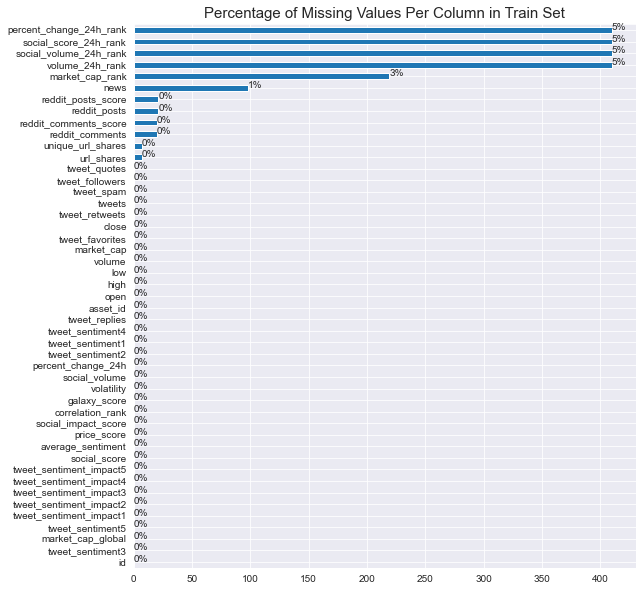

In [23]:
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

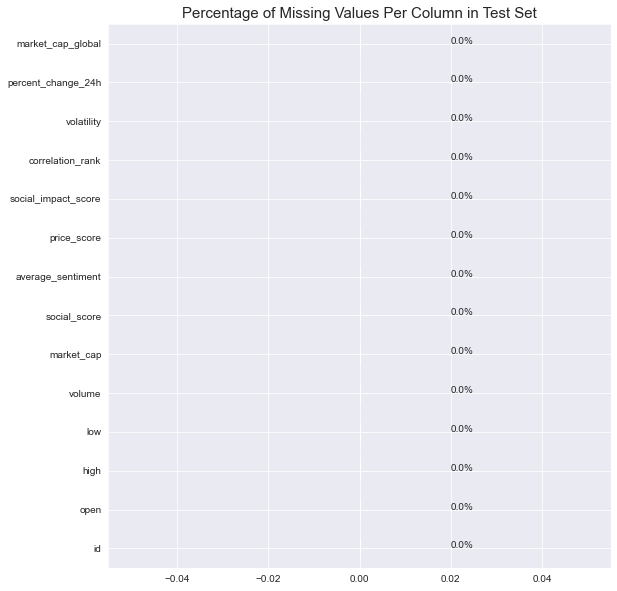

In [59]:
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

### Correlation analysis

In [58]:
train.corr()['close'].sort_values(ascending=False)

close                  1.000000
market_cap             0.999978
high                   0.999971
low                    0.999956
open                   0.999937
market_cap_global      0.998895
social_score           0.593177
volume                 0.401298
volatility             0.135882
percent_change_24h     0.090178
correlation_rank       0.045641
price_score            0.016518
social_impact_score   -0.048145
average_sentiment     -0.098324
Name: close, dtype: float64

In [57]:
train.isnull().sum()

id                     0
open                   0
high                   0
low                    0
volume                 0
market_cap             0
social_score           0
average_sentiment      0
price_score            0
social_impact_score    0
correlation_rank       0
volatility             0
percent_change_24h     0
market_cap_global      0
close                  0
dtype: int64

#### Dropping rows where entries of most important columns are missing

In [14]:
train.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)
test.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

#### Checking for remaining null values

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8039 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8039 non-null   object 
 1   asset_id                 8039 non-null   int64  
 2   open                     8039 non-null   float64
 3   high                     8039 non-null   float64
 4   low                      8039 non-null   float64
 5   volume                   8039 non-null   float64
 6   market_cap               8039 non-null   float64
 7   url_shares               8032 non-null   float64
 8   unique_url_shares        8032 non-null   float64
 9   reddit_posts             8018 non-null   float64
 10  reddit_posts_score       8018 non-null   float64
 11  reddit_comments          8019 non-null   float64
 12  reddit_comments_score    8019 non-null   float64
 13  tweets                   8039 non-null   float64
 14  tweet_spam             

#### Removing columns with percentage of missing values > 60

In [16]:
train.drop(['medium', 'youtube'], axis=1,inplace=True)
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,0.007118,1.0,606.0,2.0,1.0,1.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,0.009419,1.0,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,0.013530,1.0,692.0,3.0,1.0,1.0,10602,4.942448,1.530712e+12,49120.738484
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,0.010332,1.0,749.0,2.0,1.0,1.0,3996,2.609576,3.386925e+11,10384.798216
6,ID_325m2L,1,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,1079.0,661.0,66.0,...,0.008594,1.0,656.0,2.0,1.0,1.0,4713,1.159070,2.807819e+11,9712.247413


In [17]:
test.drop(['medium', 'youtube'], axis=1,inplace=True)
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,percent_change_24h,market_cap_global
1,ID_325SNW,1,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101460e+11,1664.0,1045.0,64.0,...,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,7245,-0.555698,3.631050e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153860e+11,397.0,255.0,11.0,...,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,2702,1.689370,1.771070e+11
5,ID_329H37,1,12309.911240,12317.022590,12286.508940,1.045155e+09,2.270840e+11,1508.0,917.0,69.0,...,78.0,0.013678,1.0,487.0,2.0,1.0,1.0,8856,3.920331,3.916730e+11
6,ID_32DnK8,1,9301.916435,9301.916435,9293.747775,6.607626e+08,1.705120e+11,1274.0,774.0,41.0,...,68.0,0.009051,1.0,940.0,2.0,1.0,1.0,4670,-0.510029,2.665700e+11
8,ID_32H6TE,1,9269.535206,9278.101979,9241.140352,5.767781e+08,1.690120e+11,707.0,488.0,15.0,...,75.0,0.018312,1.0,465.0,2.0,1.0,1.0,3525,2.604443,2.523180e+11


#### Removing columns which are barely useful

In [28]:
# list of relevant columns to keep

useful = ['id', 'open', 'high', 'low', 'volume', 'market_cap', 'social_score',
          'average_sentiment', 'price_score', 'social_impact_score',
          'correlation_rank', 'volatility', 'market_cap_global',
          'percent_change_24h', 'close']

# appending relevant columns to an empty list
drop = []
for x in list(train.columns):
  if x not in useful:
    drop.append(x)

train.drop(labels= drop,
        axis = 1,
        inplace = True)
train.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global,close
0,ID_322qz6,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,11681999.0,3.6,2.7,3.6,3.3,0.007118,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,5924770.0,3.7,2.0,2.0,1.0,0.009419,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,47796942.0,3.7,3.1,3.0,3.3,0.013530,4.942448,1.530712e+12,49120.738484
4,ID_324kJH,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,14426405.0,3.7,4.7,3.8,4.4,0.010332,2.609576,3.386925e+11,10384.798216
6,ID_325m2L,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,30476752.0,3.7,3.5,3.0,3.1,0.008594,1.159070,2.807819e+11,9712.247413


In [35]:
drop = []
for x in list(test.columns):
  if x not in useful:
    drop.append(x)


# dropping irrelevant columns in test set

test.drop(labels = drop,
          axis = 1,
          inplace = True)

test.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,price_score,social_impact_score,correlation_rank,volatility,percent_change_24h,market_cap_global
1,ID_325SNW,11335.062190,11351.690960,11335.062190,1.064152e+09,2.101460e+11,23465365.0,3.7,3.2,3.4,2.8,0.004407,-0.555698,3.631050e+11
2,ID_325uzE,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153860e+11,3832828.0,3.7,3.0,3.0,3.4,0.024035,1.689370,1.771070e+11
5,ID_329H37,12309.911240,12317.022590,12286.508940,1.045155e+09,2.270840e+11,35113830.0,3.7,3.1,3.8,5.0,0.013678,3.920331,3.916730e+11
6,ID_32DnK8,9301.916435,9301.916435,9293.747775,6.607626e+08,1.705120e+11,23962084.0,3.6,2.8,4.0,3.2,0.009051,-0.510029,2.665700e+11
8,ID_32H6TE,9269.535206,9278.101979,9241.140352,5.767781e+08,1.690120e+11,9392039.0,3.7,3.2,4.3,3.8,0.018312,2.604443,2.523180e+11


In [37]:
train.shape, test.shape

((8039, 15), (4029, 14))

In [38]:
train.to_csv("train_v1.csv")

## Data Visualisation

<AxesSubplot:xlabel='close', ylabel='Count'>

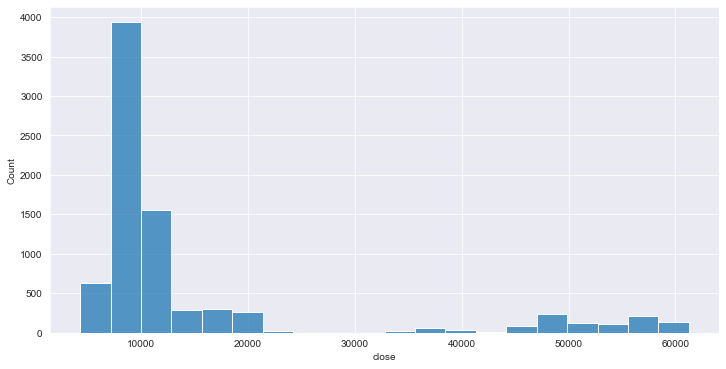

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(data=train,x="close", bins=20)

<AxesSubplot:xlabel='market_cap_global', ylabel='close'>

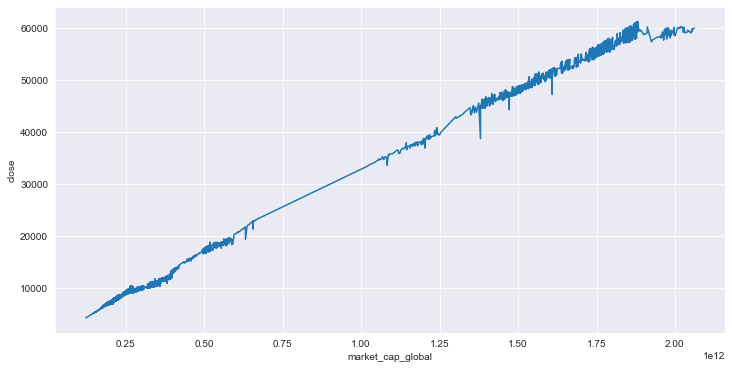

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x='market_cap_global',y='close',data=train)

<AxesSubplot:xlabel='open', ylabel='close'>

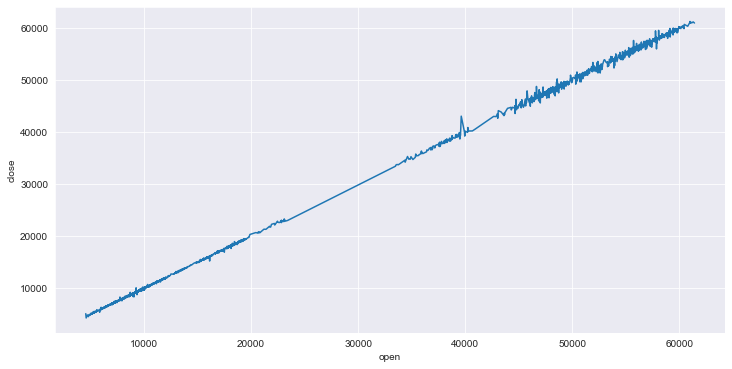

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(x='open',y='close',data=train)

In [34]:
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='tweet_spam',y='close',data=train)

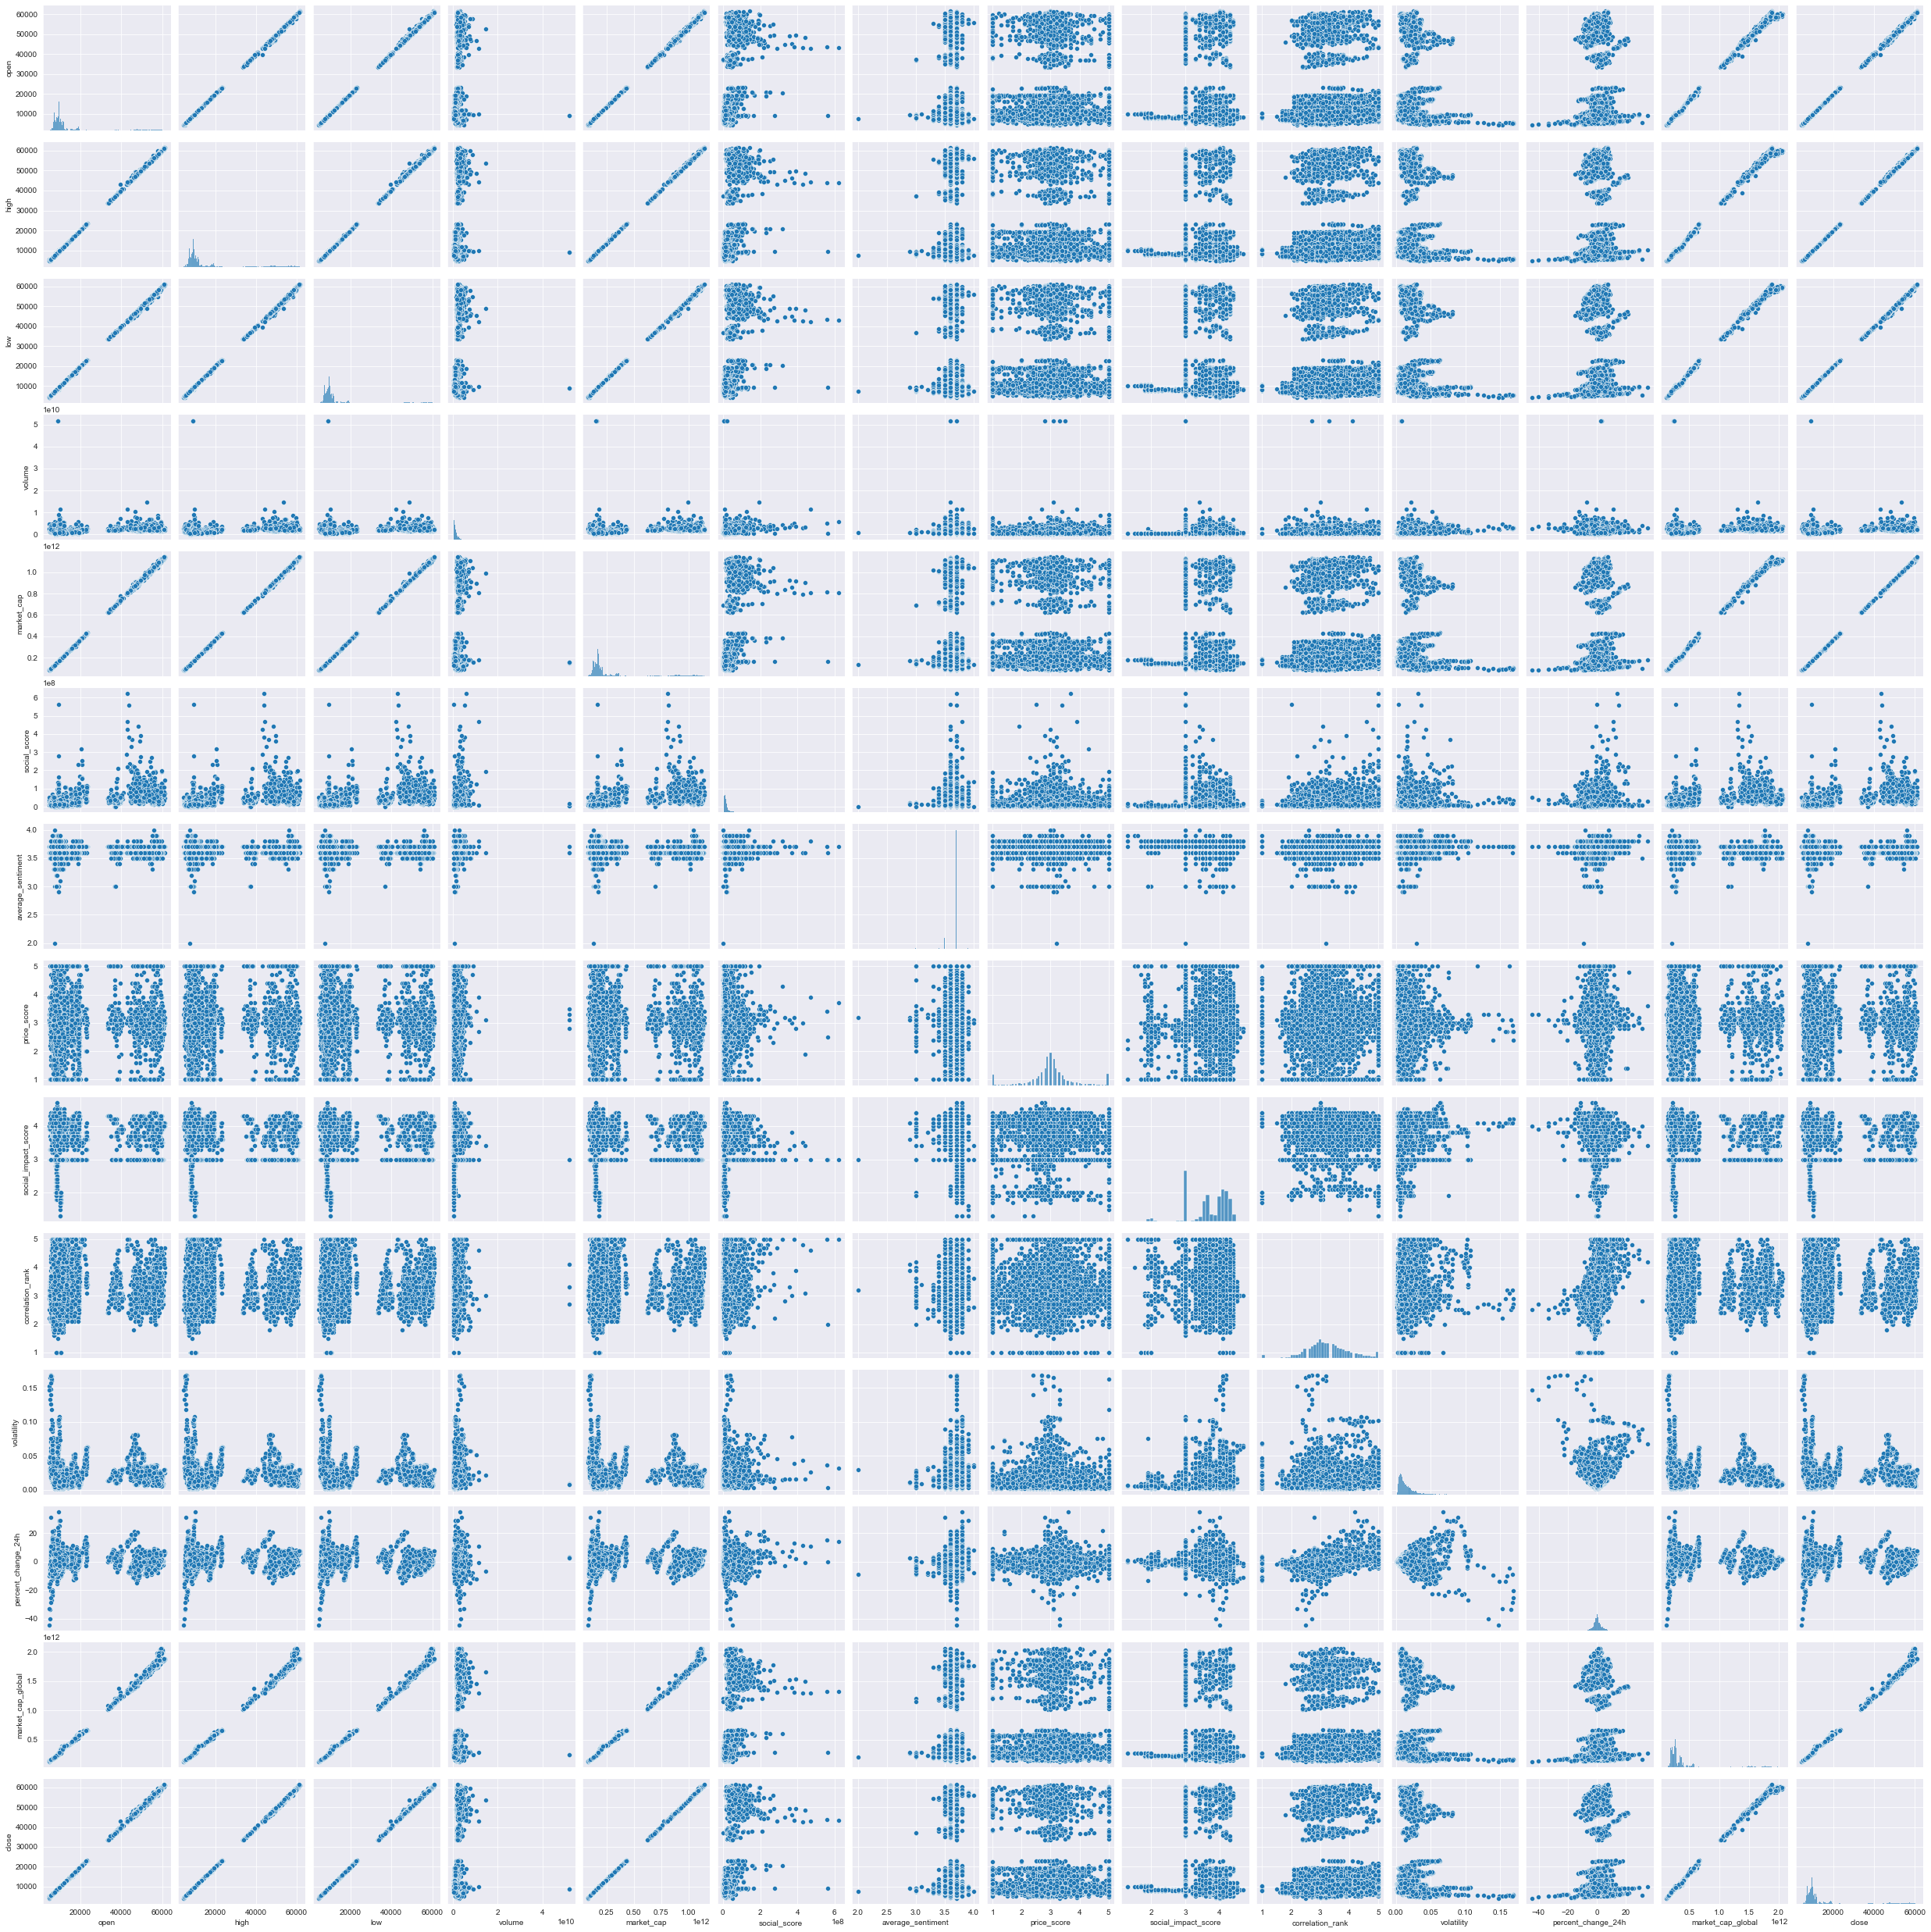

In [43]:
# sns.pairplot(train)

<AxesSubplot:>

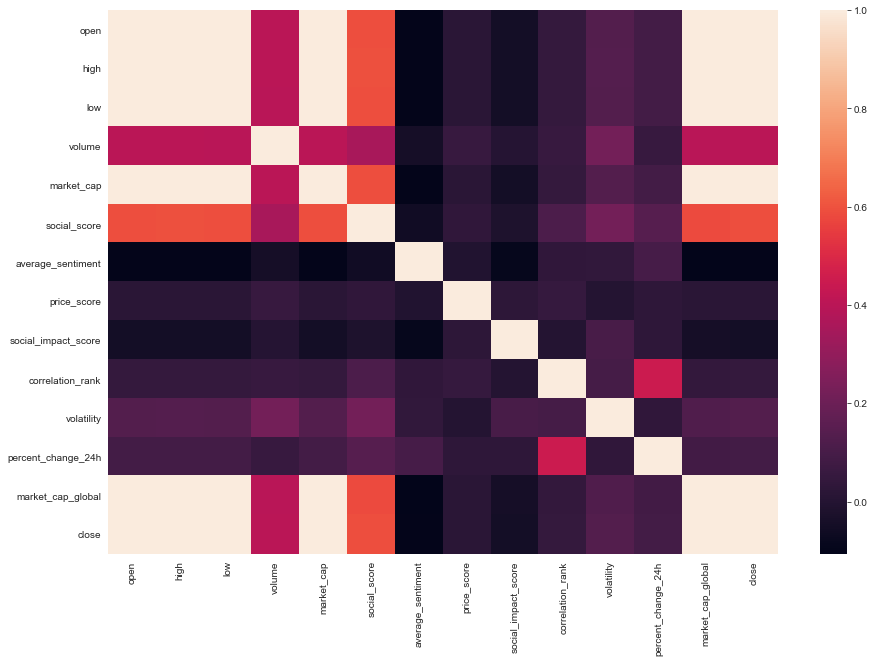

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr())

## Learning Models

### Linear Regression Model

#### X and y arrays

In [ ]:
# Creating the X and y variables

X = train.drop(['id','close'], axis=1)
y = train['close']

# features
features = list(X.columns)

#### Train Test Split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Creating and Training the Model